# Problem 1

###  Problem Statement: -     
### Q1. Kitabi Duniya, a famous book store in India, which was established before Independence, the growth of the company was incremental year by year, but due to online selling of books and wide spread Internet access its annual growth started to collapse, seeing sharp downfalls, you as a Data Scientist help this heritage book store gain its popularity back and increase footfall of customers and provide ways the business can improve exponentially, apply Association Rule Algorithm, explain the rules, and visualize the graphs for clear understanding of solution.

In [1]:
#setting current working directory
import os
os.chdir(r"D:\360 Data Science 360DigiTMG\Day17-Association_Rules-Assignment_Datasets")

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading the data to python
book = pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
#information of the data
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
#count of the data
book.count()

ChildBks     2000
YouthBks     2000
CookBks      2000
DoItYBks     2000
RefBks       2000
ArtBks       2000
GeogBks      2000
ItalCook     2000
ItalAtlas    2000
ItalArt      2000
Florence     2000
dtype: int64

In [6]:
#columns of the data
book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [7]:
#eda or statistical anlysis
book.describe()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.423000,0.247500,0.43100,0.282000,0.214500,0.241000,0.276000,0.113500,0.037000,0.048500,0.108500
std,0.494159,0.431668,0.49534,0.450086,0.410578,0.427797,0.447129,0.317282,0.188809,0.214874,0.311089
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
from mlxtend.frequent_patterns import apriori,association_rules

In [9]:
#apriori algorithm
#generating frequent itemset

frequent_items = apriori(book,min_support=0.0075,max_len=4,use_colnames=True)

C:\Users\J. Berger Perkins\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [10]:
#most frequent item based on support
frequent_items.sort_values('support',ascending = False, inplace =True)

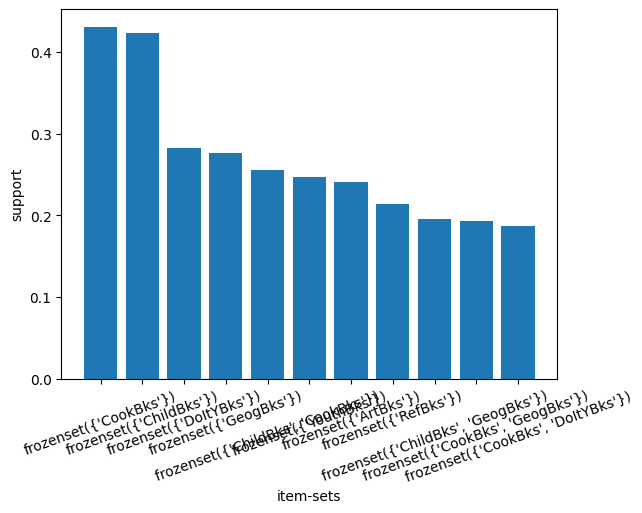

In [11]:
#barplot of top 10
plt.bar(x = list(range(0,11)), height = frequent_items.support[0:11])
plt.xticks(list(range(0, 11)),frequent_items.itemsets[0:11], rotation =20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [12]:
#generating rules
my_rules = association_rules(frequent_items,metric='lift',min_threshold=1)

In [13]:
#viewing items
my_rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
8,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
9,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347


In [16]:
my_rules.sort_values('support',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
5,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.4310,0.2820,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.2820,0.4310,0.1875,0.664894,1.542677,0.065958,1.697968
8,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
9,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347


In [22]:
def to_list(i):
    return (sorted(list(i)))
maxi = my_rules.antecedents.apply(to_list) + my_rules.consequents.apply(to_list)
maxi = maxi.apply(sorted)
rule_set = list(maxi)
unique_rules = [list(m)for m in set(tuple(i) for i in rule_set)]
index_rule = []
for i in unique_rules:
    index_rule.append(rule_set.index(i))


In [23]:
#getting rules without any redundancy
rules_no_redundancy = my_rules.iloc[index_rule,:]

In [24]:
#sorting them with respect to list and getting top 10 rules
rules_no_redundancy.sort_values('lift',ascending = False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2162,"(RefBks, ItalArt)",(ItalAtlas),0.0200,0.0370,0.0165,0.825000,22.297297,0.015760,5.502857
4224,"(YouthBks, ItalAtlas, ArtBks)",(ItalArt),0.0090,0.0485,0.0085,0.944444,19.473081,0.008064,17.127000
2546,"(ChildBks, ItalAtlas, ArtBks)",(ItalArt),0.0155,0.0485,0.0145,0.935484,19.288327,0.013748,14.748250
3658,"(ChildBks, ItalAtlas, GeogBks)",(ItalArt),0.0175,0.0485,0.0100,0.571429,11.782032,0.009151,2.220167
3432,"(ChildBks, ItalAtlas, ItalCook)",(ItalArt),0.0200,0.0485,0.0110,0.550000,11.340206,0.010030,2.114444
3376,"(ChildBks, ItalAtlas, CookBks)",(ItalArt),0.0225,0.0485,0.0115,0.511111,10.538373,0.010409,1.946250
2600,"(RefBks, ChildBks, ItalAtlas)",(ItalArt),0.0285,0.0485,0.0145,0.508772,10.490143,0.013118,1.936982
2560,"(ChildBks, ItalAtlas)",(ItalArt),0.0285,0.0485,0.0145,0.508772,10.490143,0.013118,1.936982
4402,"(ChildBks, ItalAtlas, YouthBks)",(ItalArt),0.0150,0.0485,0.0075,0.500000,10.309278,0.006772,1.903000
4210,"(RefBks, YouthBks, ItalAtlas)",(ItalArt),0.0175,0.0485,0.0085,0.485714,10.014728,0.007651,1.850139


# Problem - 2 

## Problem Statement: - 
### Q2. A film distribution company wants to target audience based on their likes and dislikes, you as a Chief Data Scientist Analyze the data and come up with different rules of movie list so that the business objective is achieved.


In [41]:
import warnings 
warnings.filterwarnings('ignore')

In [48]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [49]:
#reading the data into python
movie = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day17-Association_Rules-Assignment_Datasets\my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [50]:
#information about the data
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   V1             10 non-null     object
 1   V2             10 non-null     object
 2   V3             7 non-null      object
 3   V4             2 non-null      object
 4   V5             1 non-null      object
 5   Sixth Sense    10 non-null     int64 
 6   Gladiator      10 non-null     int64 
 7   LOTR1          10 non-null     int64 
 8   Harry Potter1  10 non-null     int64 
 9   Patriot        10 non-null     int64 
 10  LOTR2          10 non-null     int64 
 11  Harry Potter2  10 non-null     int64 
 12  LOTR           10 non-null     int64 
 13  Braveheart     10 non-null     int64 
 14  Green Mile     10 non-null     int64 
dtypes: int64(10), object(5)
memory usage: 1.3+ KB


In [51]:
#checking for null values
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [52]:
#dropping the irrelevent coloumns
movies_1 = movie.drop(['V1','V2','V3','V4','V5'],axis=1)

In [53]:
movies_1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [54]:
frequent_items = apriori(movies_1, min_support=0.0075, max_len=4, use_colnames = True)

In [55]:
# Most Frequent item sets based on support 
frequent_items.sort_values('support', ascending=False, inplace=True)

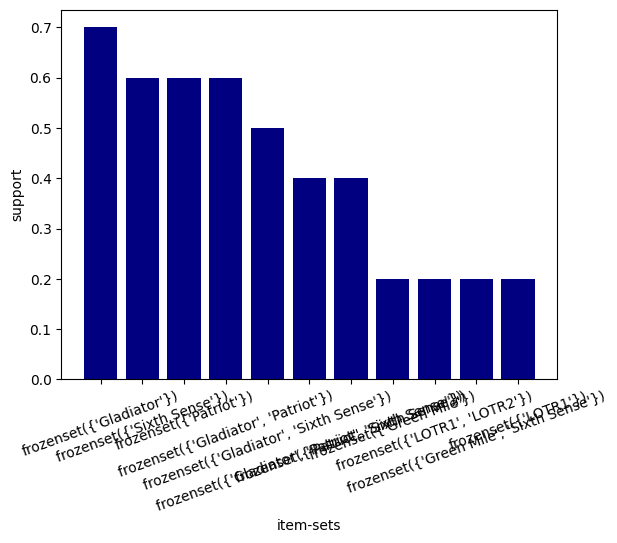

In [63]:
plt.bar(x = list(range(0,11)),height=frequent_items.support[0:11], color ='navy')

plt.xticks(list(range(0,11)), frequent_items.itemsets[0:11], rotation = 20)

plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [64]:
my_rules = association_rules(frequent_items,metric='lift',min_threshold=1)

In [65]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
3,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
4,"(Gladiator, Patriot)",(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
...,...,...,...,...,...,...,...,...,...
203,"(Harry Potter1, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
204,(Green Mile),"(LOTR1, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
205,(LOTR1),"(Green Mile, Harry Potter1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8
206,(Harry Potter1),"(Green Mile, LOTR1, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8


In [66]:
my_rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
148,"(Green Mile, Gladiator, Sixth Sense)",(LOTR),0.1,0.1,0.1,1.000000,10.000000,0.09,inf
37,"(Harry Potter1, LOTR2)","(LOTR1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
24,"(LOTR1, Sixth Sense)","(Green Mile, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
107,"(Green Mile, LOTR2)","(Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
106,"(Green Mile, Harry Potter1)","(LOTR2, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
...,...,...,...,...,...,...,...,...,...
9,(Sixth Sense),"(Gladiator, Patriot)",0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
10,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
11,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
117,"(Gladiator, Sixth Sense)",(Green Mile),0.5,0.2,0.1,0.200000,1.000000,0.00,1.0


In [68]:
def to_list(i):
    return (sorted(list(i)))
maxi = my_rules.antecedents.apply(to_list) + my_rules.consequents.apply(to_list)
maxi = maxi.apply(sorted)
rule_set = list(maxi)
unique_rule_set= [list (m) for m in set(tuple(i) for i in rule_set)]

index_rule =[]
for i in unique_rule_set:
    index_rule.append(rule_set.index(i))

In [69]:
# getting rules without any redudancy 
rules_no_redundancy = my_rules.iloc[index_rule,:]

In [70]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redundancy.sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
188,(Harry Potter1),(Harry Potter2),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
180,(Green Mile),(LOTR),0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
44,"(LOTR1, Sixth Sense)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
96,"(Green Mile, LOTR1)",(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
126,"(Green Mile, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
194,"(Green Mile, LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
12,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
90,"(LOTR1, Harry Potter1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
120,"(Green Mile, LOTR1)",(LOTR2),0.1,0.2,0.1,1.000000,5.000000,0.08,inf
186,(Harry Potter1),(LOTR2),0.2,0.2,0.1,0.500000,2.500000,0.06,1.60


# Problem - 3

### Problem Statement: - 
### Q3. A Mobile Phone manufacturing company wants to launch its three-brand new phone into the market, but before going with its traditional marketing approach this time it wants to analyze the data of its previous model sales in different regions and you have been hired as an Data Scientist to help them out, use the Association rules concept and provide your insights to the company’s marketing team to improve its sales.


In [71]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules

In [72]:
#reading the data into python
df = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day17-Association_Rules-Assignment_Datasets\myphonedata.csv")
df

,V1,V2,V3,red,white,green,yellow,orange,blue
0,red,white,green,1,1,1,0,0,0
1,white,orange,NaN,0,1,0,0,1,0
2,white,blue,NaN,0,1,0,0,0,1
3,red,white,orange,1,1,0,0,1,0
4,red,blue,NaN,1,0,0,0,0,1
5,white,blue,NaN,0,1,0,0,0,1
6,red,blue,NaN,1,0,0,0,0,1
7,red,white,blue,1,1,0,0,0,1
8,green,NaN,NaN,0,0,1,0,0,0
9,red,white,blue,1,1,0,0,0,1


In [73]:
#information of the column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      11 non-null     object
 1   V2      9 non-null      object
 2   V3      4 non-null      object
 3   red     11 non-null     int64 
 4   white   11 non-null     int64 
 5   green   11 non-null     int64 
 6   yellow  11 non-null     int64 
 7   orange  11 non-null     int64 
 8   blue    11 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 920.0+ bytes


In [75]:
#shape of the data
df.shape

(11, 9)

In [76]:
#check any null values is present
df.isnull().sum()

V1        0
V2        2
V3        7
red       0
white     0
green     0
yellow    0
orange    0
blue      0
dtype: int64

In [77]:
#drop the irrelevent columns
df1 = df.drop(['V1','V2','V3'], axis=1)
df1

,red,white,green,yellow,orange,blue
0,1,1,1,0,0,0
1,0,1,0,0,1,0
2,0,1,0,0,0,1
3,1,1,0,0,1,0
4,1,0,0,0,0,1
5,0,1,0,0,0,1
6,1,0,0,0,0,1
7,1,1,0,0,0,1
8,0,0,1,0,0,0
9,1,1,0,0,0,1


In [78]:
##apriori algorithm
#generating frequent itemset
frequent_items = apriori(df1,min_support=0.0075, use_colnames=True, max_len=4)

In [79]:
# Most Frequent item sets based on support 
frequent_items.sort_values('support', ascending=False, inplace=True)

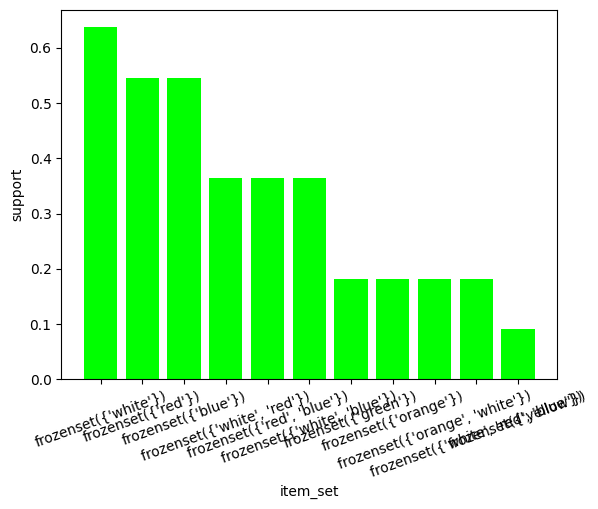

In [80]:
plt.bar(x = list(range(0,11)),height=frequent_items.support[0:11],color='lime')
plt.xticks(list(range(0,11)),frequent_items.itemsets[0:11],rotation = 20)
plt.xlabel("item_set")
plt.ylabel('support')
plt.show()

In [81]:
#generating rules
my_rules = association_rules(frequent_items,metric='lift',min_threshold=1)

In [82]:
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
1,(red),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
3,(blue),(red),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
5,(blue),(white),0.545455,0.636364,0.363636,0.666667,1.047619,0.016529,1.090909
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
8,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
9,"(green, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf


In [83]:
my_rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
13,(red),"(green, white)",0.545455,0.090909,0.090909,0.166667,1.833333,0.041322,1.090909
8,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
17,(white),"(orange, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
7,(white),(orange),0.636364,0.181818,0.181818,0.285714,1.571429,0.066116,1.145455
12,(white),"(green, red)",0.636364,0.090909,0.090909,0.142857,1.571429,0.033058,1.060606
14,"(orange, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
9,"(green, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
10,"(white, red)",(green),0.363636,0.181818,0.090909,0.250000,1.375000,0.024793,1.090909
11,(green),"(white, red)",0.181818,0.363636,0.090909,0.500000,1.375000,0.024793,1.272727


In [86]:
def to_list(i):
    return (sorted(list(i)))
maxi = my_rules.antecedents.apply(to_list) + my_rules.consequents.apply(to_list)
maxi = maxi.apply(sorted)
rule_set = list(maxi)

unique_rule_set = [list (m) for m in set(tuple(i) for i in rule_set)]

index_rule = []
for i in unique_rule_set:
    index_rule.append(rule_set.index(i))

In [87]:
# getting rules without any redudancy 
rules_no_redundancy = my_rules.iloc[index_rule,:]

In [88]:
## Sorting them with respect to list and getting top 10 rules 
rules_no_redundancy.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,"(green, white)",(red),0.090909,0.545455,0.090909,1.000000,1.833333,0.041322,inf
14,"(orange, red)",(white),0.090909,0.636364,0.090909,1.000000,1.571429,0.033058,inf
6,(orange),(white),0.181818,0.636364,0.181818,1.000000,1.571429,0.066116,inf
2,(red),(blue),0.545455,0.545455,0.363636,0.666667,1.222222,0.066116,1.363636
0,(white),(red),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606
4,(white),(blue),0.636364,0.545455,0.363636,0.571429,1.047619,0.016529,1.060606


# problem - 4

### Problem Statement: - 
### Q4. A retail store in India, has its transaction data, and it would like to know the buying pattern of the consumers in its locality, you have been assigned this task to provide the manager with rules on how the placement of products needs to be there in shelves so that it can improve the buying patterns of consumes and increase customer footfall. 


In [108]:
#importing required libraries

import numpy as np
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules

In [109]:
#reading the data into python

transactions_retail = pd.read_csv(r"D:\360 Data Science 360DigiTMG\Day17-Association_Rules-Assignment_Datasets\transactions_retail.csv")
type(transactions_retail)

pandas.core.frame.DataFrame

In [110]:
#head of the data to view

transactions_retail.head()

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
0,'LANTERN','METAL','WHITE',NaN,NaN,NaN
1,'COAT','CREAM','CUPID','HANGER','HEARTS',NaN
2,'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'
3,'HEART.','HOTTIE','RED','WHITE','WOOLLY',NaN
4,'7','BABUSHKA','BOXES','NESTING','SET',NaN


In [111]:
#shape of the data

transactions_retail.shape

(557040, 6)

In [112]:
#values of the column in data

transactions_retail.columns.values

array(["'HANGING'", "'HEART'", "'HOLDER'", "'T-LIGHT'", "'WHITE'", 'NA'],
      dtype=object)

In [113]:
#data types of the column in data

transactions_retail.dtypes

'HANGING'    object
'HEART'      object
'HOLDER'     object
'T-LIGHT'    object
'WHITE'      object
NA           object
dtype: object

In [114]:
#information of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   V1      11 non-null     object
 1   V2      9 non-null      object
 2   V3      4 non-null      object
 3   red     11 non-null     int64 
 4   white   11 non-null     int64 
 5   green   11 non-null     int64 
 6   yellow  11 non-null     int64 
 7   orange  11 non-null     int64 
 8   blue    11 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 920.0+ bytes


In [115]:
#Exploratory Data Analysis
# Check the descriptive statistics of numeric variables

transactions_retail.describe()

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
count,557040,538818,525799,436182,222350,83150
unique,949,1177,1099,856,489,184
top,'BAG','HEART','RED','OF','SET','SET'
freq,41795,16186,18724,20683,14738,16194


In [116]:
#1st moment Business Decision # Measures of Central Tendency / First moment business decision

transactions_retail.mode()

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
0,'BAG','HEART','RED','OF','SET','SET'


In [117]:
#Drop Column which has lots of NA Values so it will create problem

transactions_retail1 = transactions_retail.drop(["NA"], axis=1)
transactions_retail1

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE'
0,'LANTERN','METAL','WHITE',NaN,NaN
1,'COAT','CREAM','CUPID','HANGER','HEARTS'
2,'BOTTLE','FLAG','HOT','KNITTED','UNION'
3,'HEART.','HOTTIE','RED','WHITE','WOOLLY'
4,'7','BABUSHKA','BOXES','NESTING','SET'
...,...,...,...,...,...
557035,'20','NAPKINS','OF','PACK','SPACEBOY'
557036,'APRON','CHILDREN''S','DOLLY','GIRL',NaN
557037,'CHILDRENS','CUTLERY','DOLLY','GIRL',NaN
557038,'CHILDRENS','CIRCUS','CUTLERY','PARADE',NaN


In [119]:
#remove all na values from the dataset

transactions_retail1= transactions_retail1.dropna()
transactions_retail1

,'HANGING','HEART','HOLDER','T-LIGHT','WHITE',NA
2,'BOTTLE','FLAG','HOT','KNITTED','UNION','WATER'
13,'6','ASSORTED','BOX','COLOUR','OF','TEASPOONS'
31,'AND','CARD','GAME','HEADS','TAILS','VINTAGE'
33,'BOXES','OF4','ROUND','SET','SNACK','WOODLAND'
39,'2','I','LONDON','LOVE','SET','TEA'
...,...,...,...,...,...,...
556989,'6','OF','PERFECTLY','PRETTY','RIBBONS','SET'
556996,'FLOCK','FRAME','HEART','LOVE','PHOTO','RED'
557011,'12','CHALK','RETRO','SET','STICKS','WHITE'
557016,'6','BOTTLES','CRATE','IN','MILK','SCHOOL'


In [121]:
#convert into numeric --- create dummy variable

transactions_retail_new = pd.get_dummies(transactions_retail1)
transactions_retail_new

,'HANGING'_'&','HANGING'_'''N''','HANGING'_'+',"'HANGING'_','",'HANGING'_'-','HANGING'_'0','HANGING'_'1','HANGING'_'10','HANGING'_'11','HANGING'_'12',...,NA_'YOU',NA_'YOUR',NA_'ZINC',NA_'mrked',NA_'rcvd',NA_'ret',NA_'set',NA_'ta',NA_'this',NA_'to'
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556989,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
556996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
557011,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
557016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [122]:
#Model Building 
frequent_items = apriori(transactions_retail_new, min_support=0.0075, max_len=4, use_colnames=True)

In [124]:
frequent_items.sort_values('support',ascending=False,inplace=True)

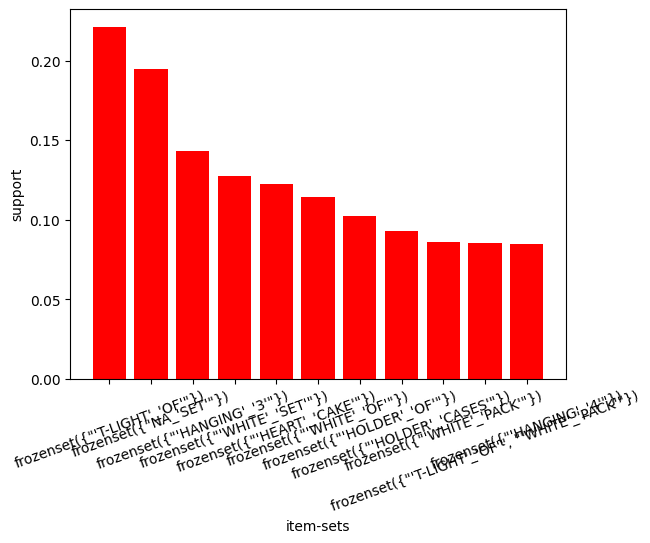

In [135]:
plt.bar(x=list(range(0,11)), height=frequent_items.support[0:11],color='red')
plt.xticks(list(range(0,11)), frequent_items.itemsets[0:11],rotation=20)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

In [129]:
my_rules=association_rules(frequent_items,metric='lift',min_threshold=1)
my_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,('T-LIGHT'_'OF'),('WHITE'_'PACK'),0.221227,0.085833,0.085051,0.384452,4.479082,0.066063,1.485128
1,('WHITE'_'PACK'),('T-LIGHT'_'OF'),0.085833,0.221227,0.085051,0.990893,4.479082,0.066063,85.509308
2,('HEART'_'CAKE'),('HOLDER'_'CASES'),0.122225,0.092688,0.078040,0.638493,6.888628,0.066711,2.509802
3,('HOLDER'_'CASES'),('HEART'_'CAKE'),0.092688,0.122225,0.078040,0.841962,6.888628,0.066711,5.554198
4,('T-LIGHT'_'OF'),(NA_'SET'),0.221227,0.194756,0.077270,0.349280,1.793418,0.034185,1.237465
...,...,...,...,...,...,...,...,...,...
8875,(NA_'TINS'),"('T-LIGHT'_'SET', 'HOLDER'_'OF')",0.019771,0.023608,0.007517,0.380170,16.103496,0.007050,1.575259
8876,('T-LIGHT'_'SET'),"(NA_'TINS', 'HOLDER'_'OF')",0.060601,0.019771,0.007517,0.124033,6.273301,0.006318,1.119024
8877,('HOLDER'_'OF'),"(NA_'TINS', 'T-LIGHT'_'SET')",0.102465,0.007517,0.007517,0.073357,9.759390,0.006746,1.071052
8878,(NA_'TINS'),('T-LIGHT'_'SET'),0.019771,0.060601,0.007517,0.380170,6.273301,0.006318,1.515575


In [130]:
my_rules.sort_values('lift',ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8657,"('T-LIGHT'_'FELT', 'HEART'_'CRAFT', 'HANGING'_...",('HOLDER'_'CREAM'),0.007613,0.007613,0.007613,1.0,131.35861,0.007555,inf
8678,('HOLDER'_'CREAM'),"('WHITE'_'PINK', 'HEART'_'CRAFT', 'HANGING'_'B...",0.007613,0.007613,0.007613,1.0,131.35861,0.007555,inf
8738,"('WHITE'_'PINK', 'HANGING'_'BOX')","('HOLDER'_'CREAM', 'T-LIGHT'_'FELT')",0.007613,0.007613,0.007613,1.0,131.35861,0.007555,inf
8735,"('HOLDER'_'CREAM', 'T-LIGHT'_'FELT')","('WHITE'_'PINK', 'HANGING'_'BOX')",0.007613,0.007613,0.007613,1.0,131.35861,0.007555,inf
8845,"('WHITE'_'PINK', 'T-LIGHT'_'FELT', 'HEART'_'CR...",('HOLDER'_'CREAM'),0.007613,0.007613,0.007613,1.0,131.35861,0.007555,inf


In [131]:
#profusion - observer carefully they are duplicate (product combinations)
#Antecedent and consequent is exchanging
# we want without duplicate


In [132]:
def to_list(i):
    return(sorted(i))
maxi = my_rules.antecedents.apply(to_list) + my_rules.consequents.apply(to_list)
maxi = maxi.apply(sorted)

rule_set = list(maxi)
unique_rule_set = [list(m) for m in set(tuple(i) for i in rule_set)]

index_set = []
for i in unique_rule_set:
    index_set.append(rule_set.index(i))

In [133]:
# getting rules without any redudancy 
rules_no_redundancy = my_rules.iloc[index_rule,:]

In [134]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redundancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,('HOLDER'_'CASES'),('HANGING'_'60'),0.092688,0.053253,0.053229,0.574283,10.784020,0.048293,2.223888
2,('HEART'_'CAKE'),('HOLDER'_'CASES'),0.122225,0.092688,0.078040,0.638493,6.888628,0.066711,2.509802
0,('T-LIGHT'_'OF'),('WHITE'_'PACK'),0.221227,0.085833,0.085051,0.384452,4.479082,0.066063,1.485128
6,('WHITE'_'OF'),(NA_'SET'),0.114504,0.194756,0.073037,0.637853,3.275132,0.050736,2.223528
8,('HEART'_'CAKE'),('T-LIGHT'_'OF'),0.122225,0.221227,0.061563,0.503690,2.276804,0.034524,1.569126
4,('T-LIGHT'_'OF'),(NA_'SET'),0.221227,0.194756,0.077270,0.349280,1.793418,0.034185,1.237465


In [ ]:
#  So, we see top 10 Association Rules on how the placement of products needs to be there in shelves 
#  so that it can improve the buying patterns of consumes and increase customer footfall.